#### psymukb analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

disease_list = ['Autism_ASD','Developmental_Delay_DD','Fetal_non-Preterm_birth_non-PTB','Fetal_preterm_birth_PTB','Mix_Autism_or_Schizophrenia','Sibling_Control']
# 1000,24,863,497,198,1000
tissue_list = ['hippocampus','cerebellum','prefrontal_cortex','temporal_lobe','substantia_nigra']

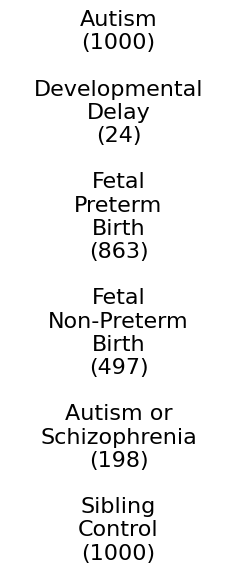

In [2]:
plt.figure(figsize=(2.8, 4)) 

text = "Autism\n(1000)\n\nDevelopmental\nDelay\n(24)\n\nFetal\nPreterm\nBirth\n(863)\n\nFetal\nNon-Preterm\nBirth\n(497)\n\nAutism or\nSchizophrenia\n(198)\n\nSibling\nControl\n(1000)"
plt.text(0.5, 0.5, text,
         fontsize=16, ha='center', va='center')

plt.axis('off')
plt.savefig("images/0text_image.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

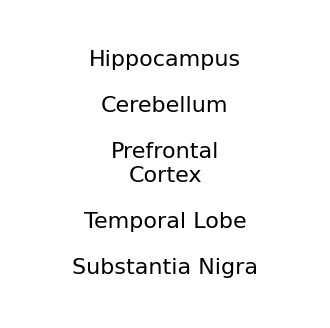

In [3]:
plt.figure(figsize=(4, 4)) 

text = "Hippocampus\n\nCerebellum\n\nPrefrontal\nCortex\n\nTemporal Lobe\n\nSubstantia Nigra"
plt.text(0.5, 0.5, text,
         fontsize=16, ha='center', va='center')

plt.axis('off')
plt.savefig("images/1text_image.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

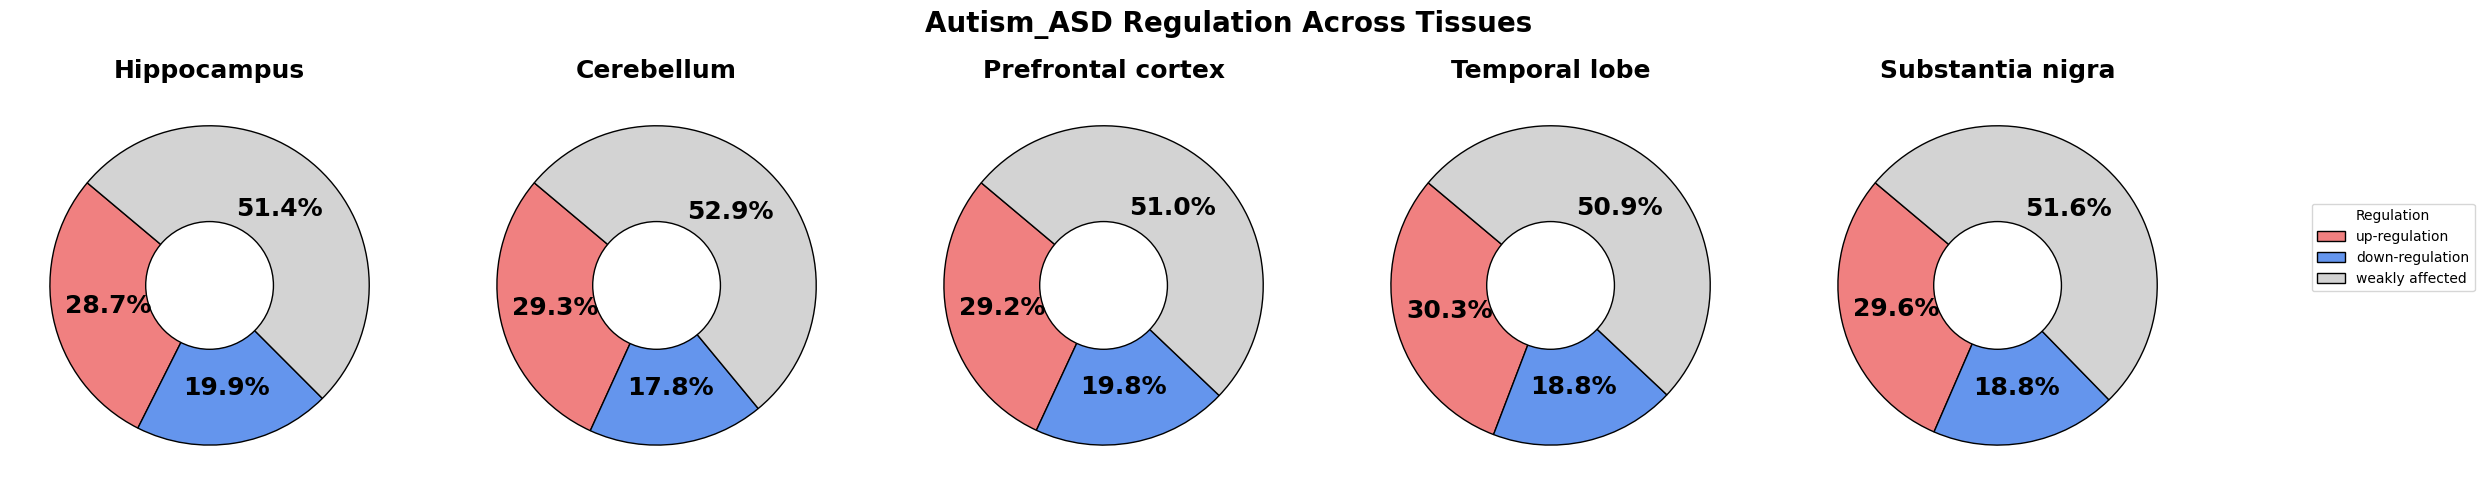

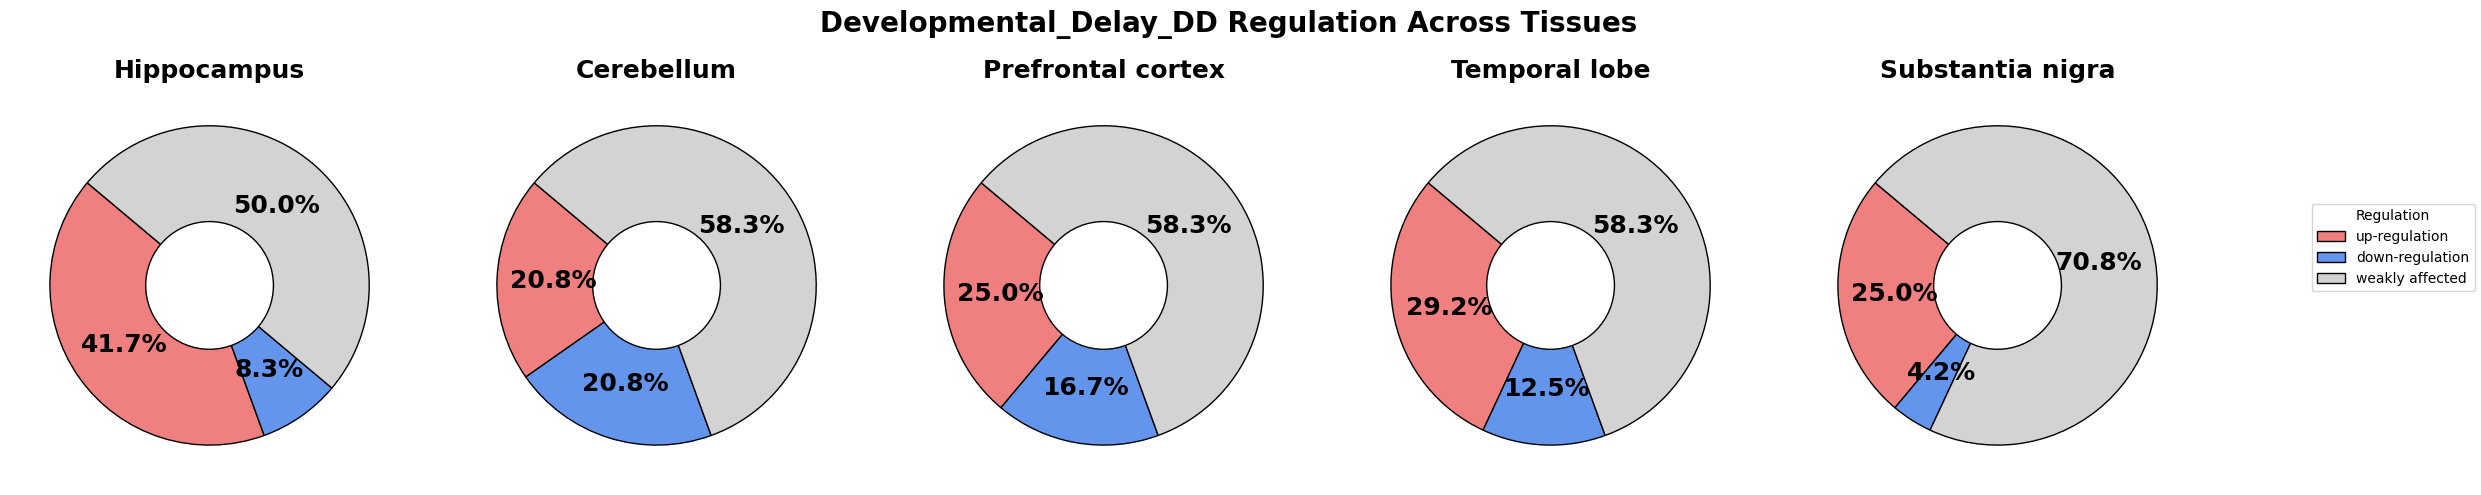

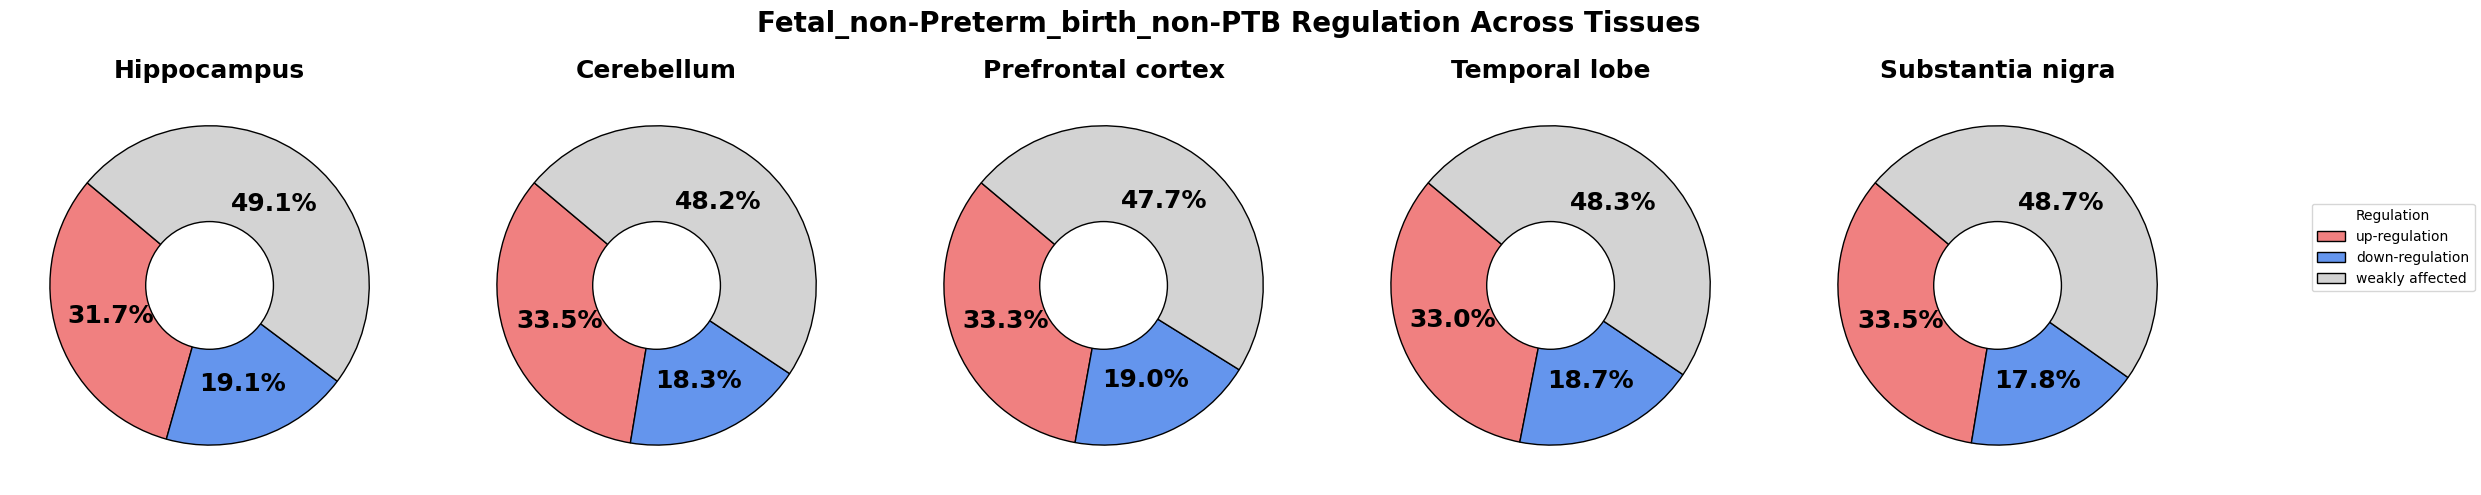

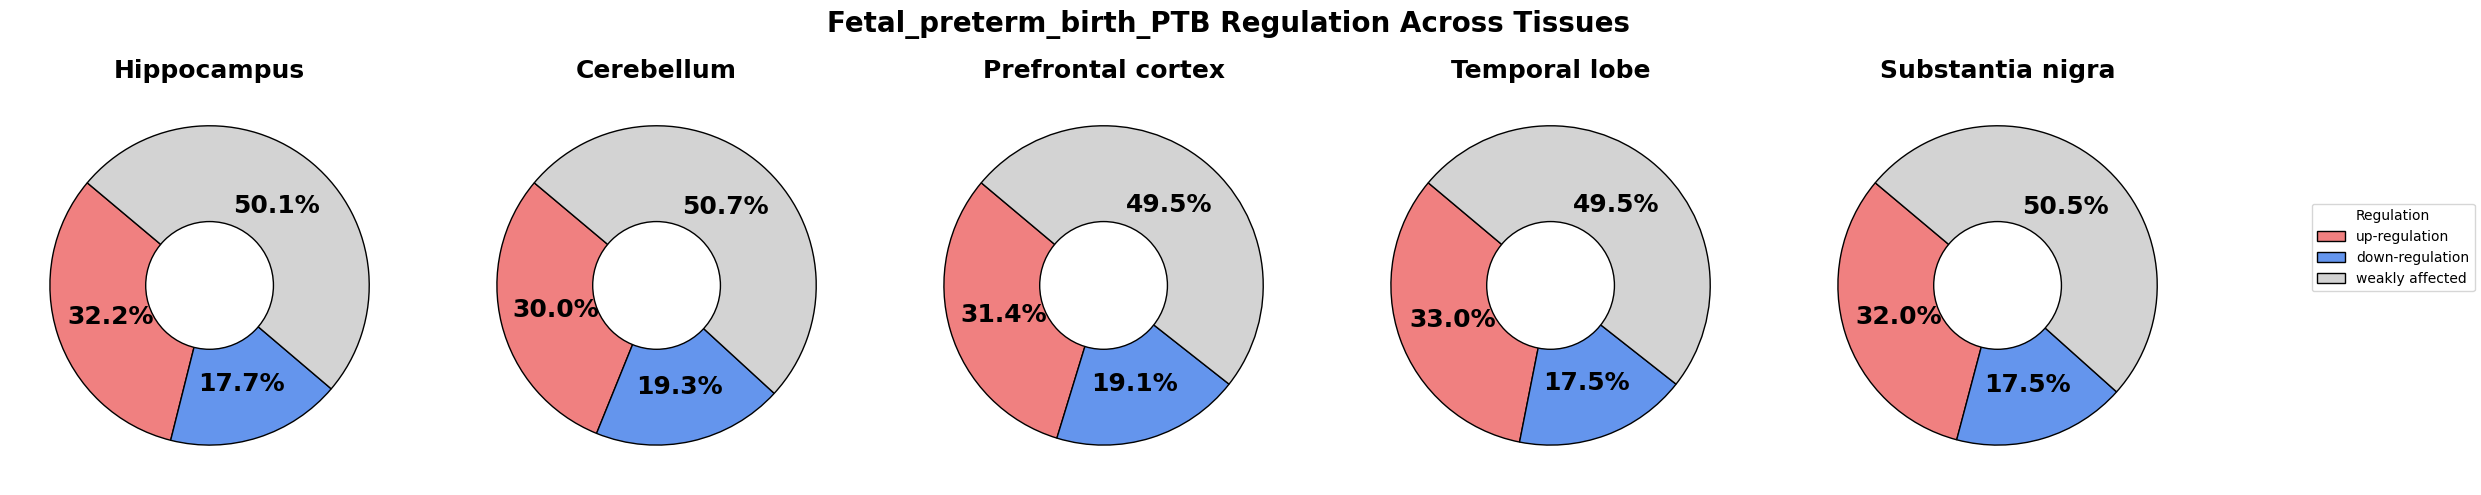

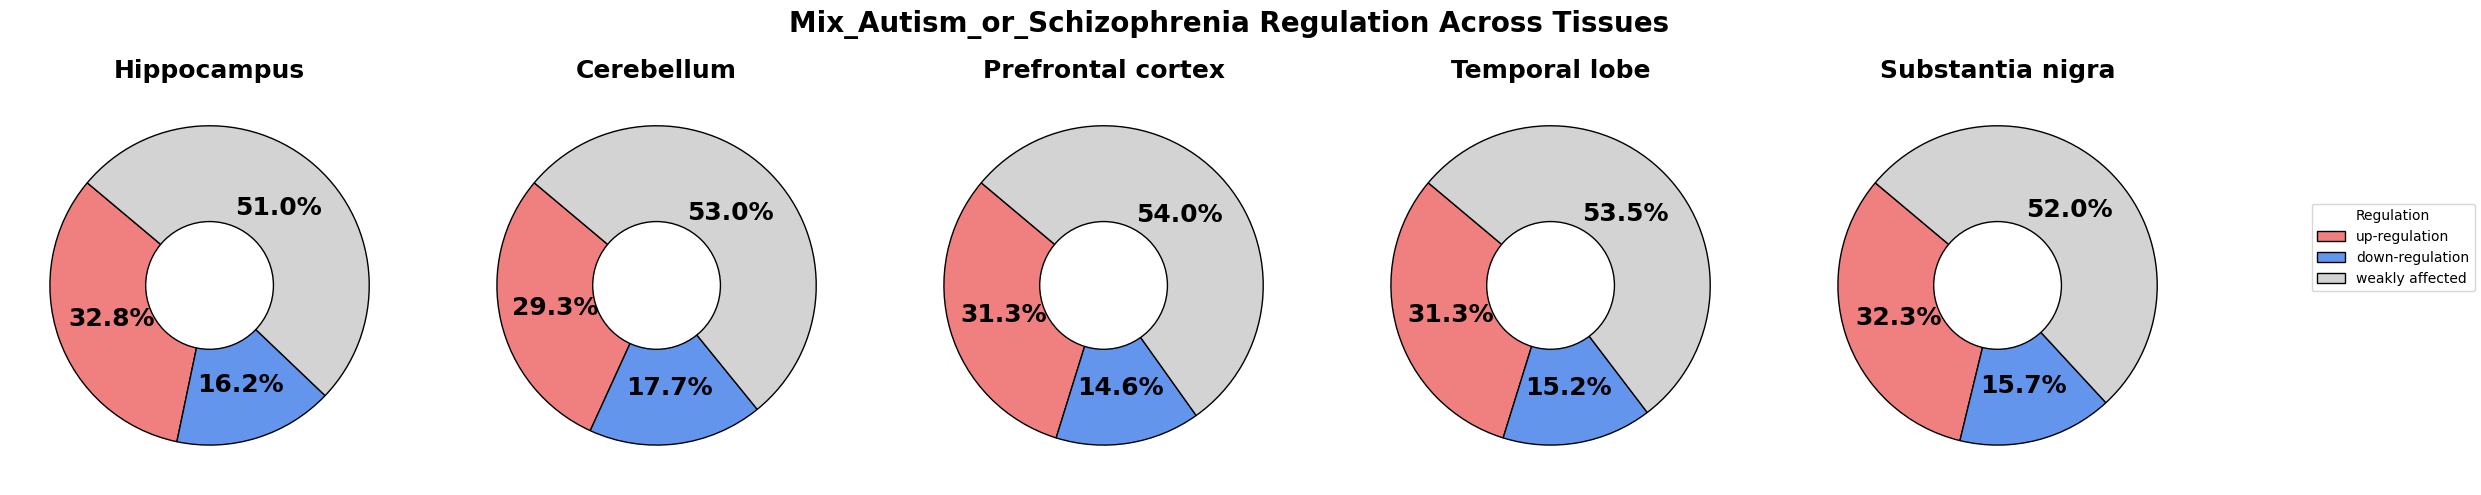

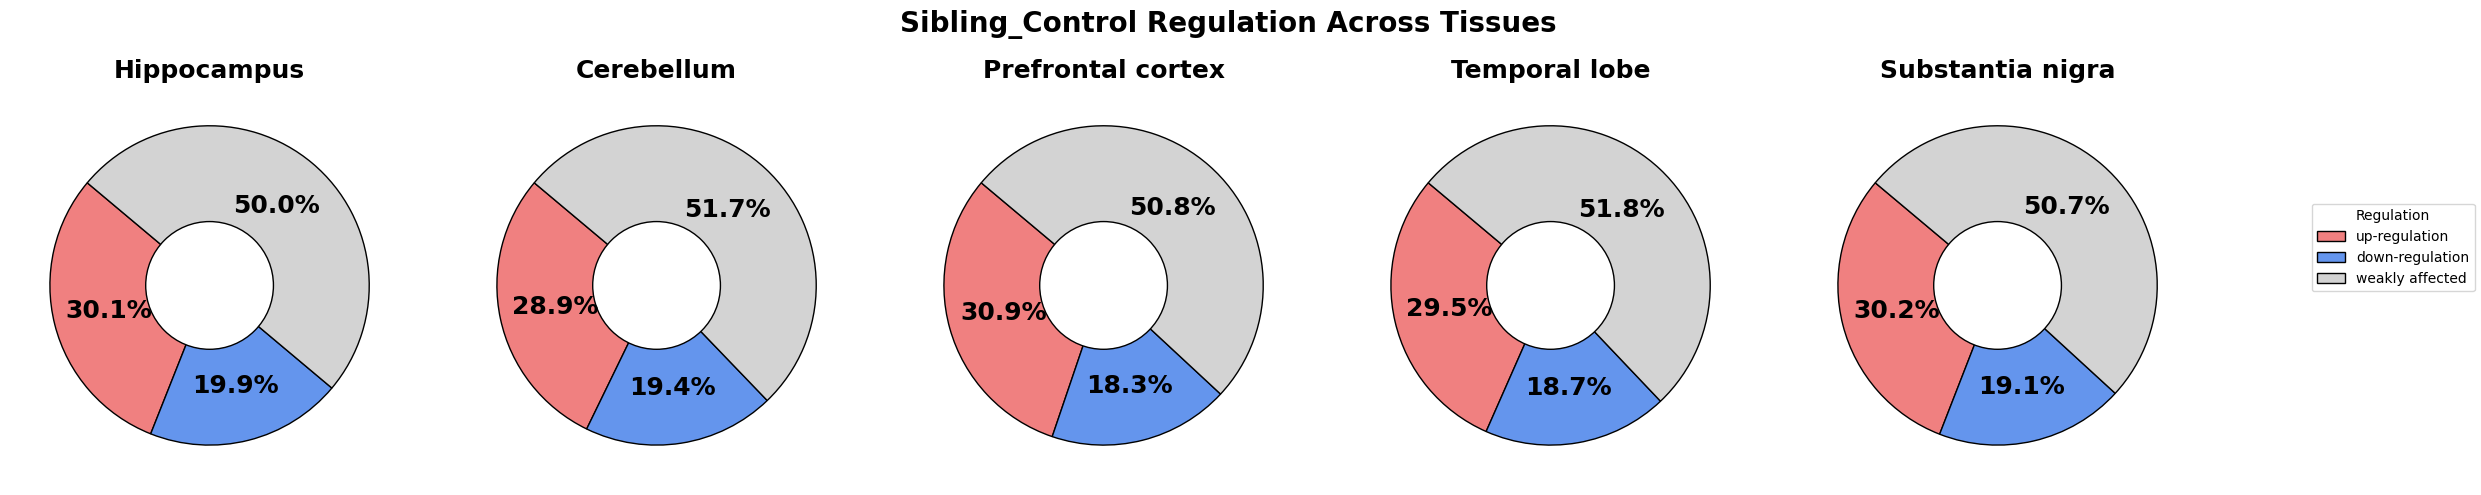

In [4]:
# colors = ["red", "blue", "gray"]
colors = ["#F08080", "#6495ED", "#D3D3D3"]
labels = ["up-regulation", "down-regulation", "weakly affected"]

for disease in disease_list:
    data = pd.read_csv('datasets/' + disease + '_pred_final.csv')
    fig, axes = plt.subplots(1, len(tissue_list), figsize=(5 * len(tissue_list), 5))
    if len(tissue_list) == 1:
        axes = [axes]

    for i, tissue in enumerate(tissue_list):
        slope_col = f"{tissue}_slope"
        sign_col = f"{tissue}_sign"
        data[slope_col] = data[slope_col] * data[sign_col].map({'Up-regulation': 1, 'Down-regulation': -1})

        up = (data[slope_col] > 0.3).sum()
        down = (data[slope_col] < -0.3).sum()
        weak = ((data[slope_col] >= -0.3) & (data[slope_col] <= 0.3)).sum()
        values = [up, down, weak]

        ax = axes[i]
        wedges, texts, autotexts = ax.pie(
            values, labels=None, colors=colors, autopct="%1.1f%%",
            startangle=140, pctdistance=0.65,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        )
        center_circle = plt.Circle((0, 0), 0.4, fc='white', edgecolor='black', linewidth=1)
        ax.add_artist(center_circle)

        for autotext in autotexts:
            autotext.set_fontsize(18)
            autotext.set_weight("bold")

        ax.set_title(f"{tissue.replace('_', ' ').capitalize()}", fontsize=18, fontweight='bold')

    fig.legend(wedges, labels, title="Regulation", loc='center right', fontsize=10)
    plt.suptitle(f"{disease} Regulation Across Tissues", fontsize=20, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 0.9, 0.95])

    plt.savefig(f"images/{disease}_combined_regulation_donut.png", dpi=300)
    plt.show()
    plt.close()

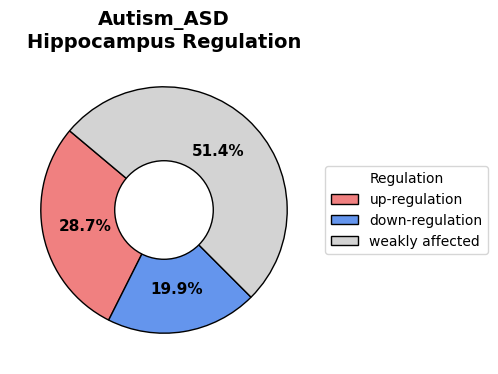

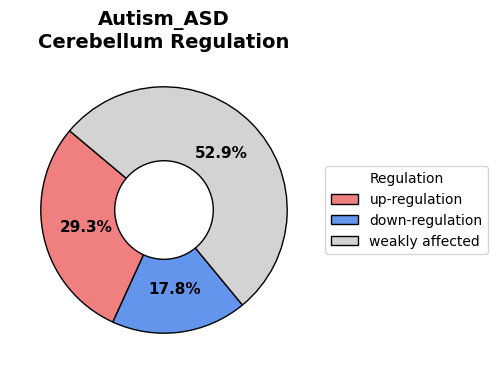

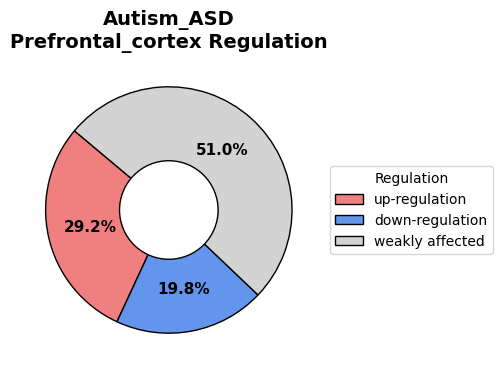

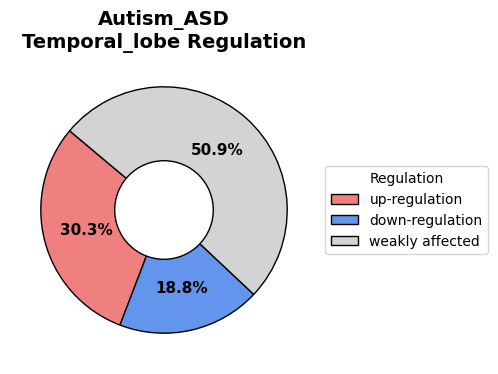

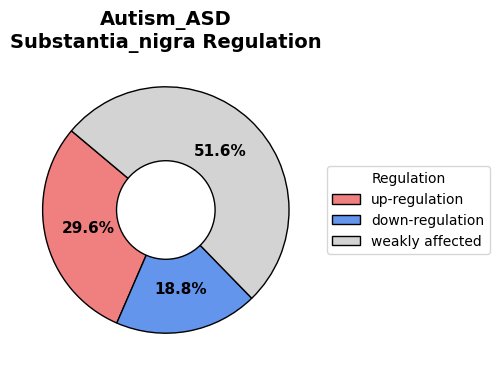

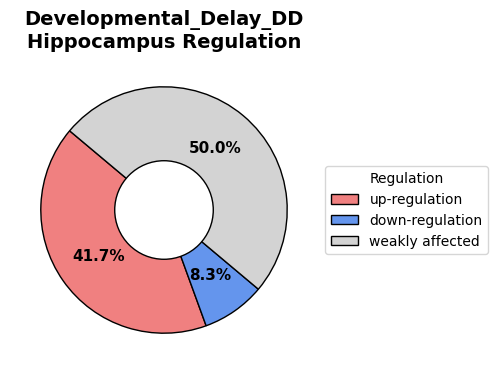

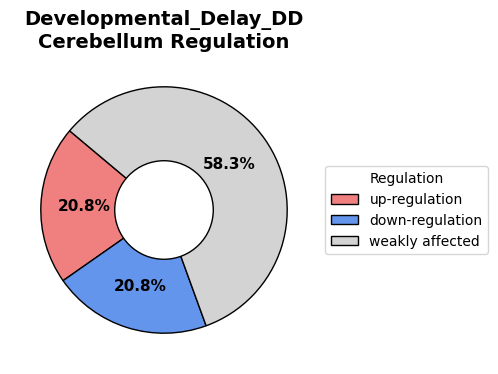

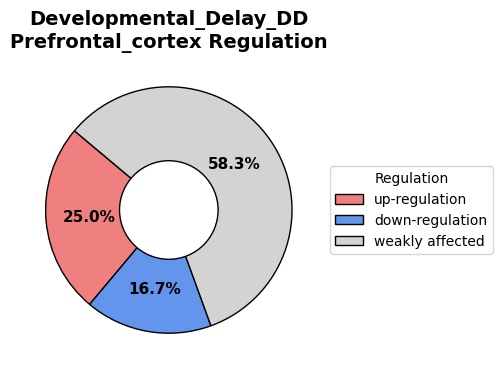

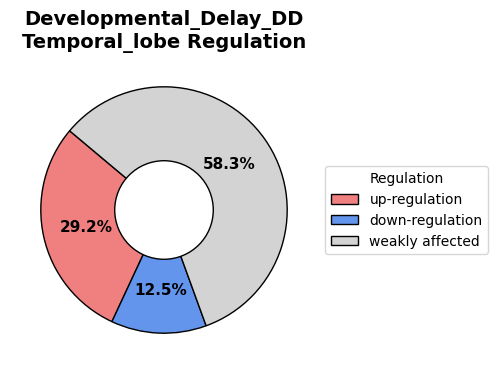

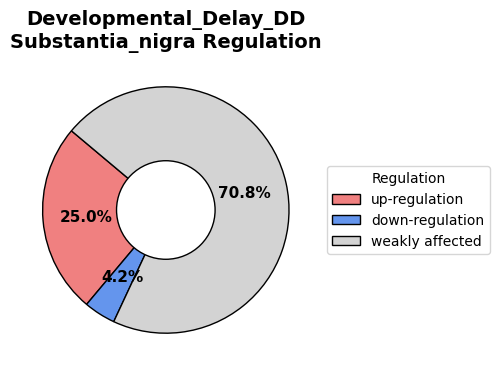

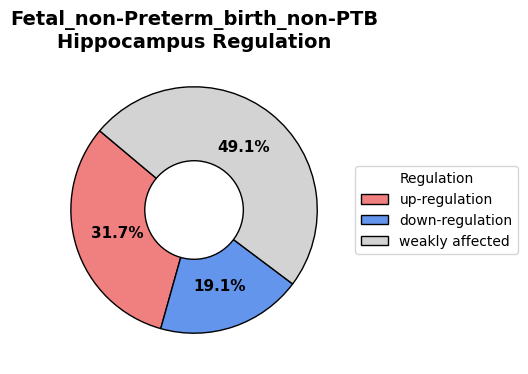

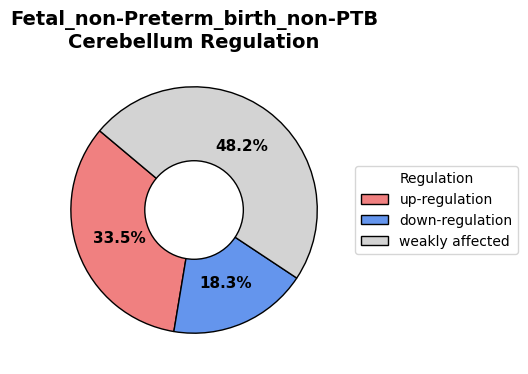

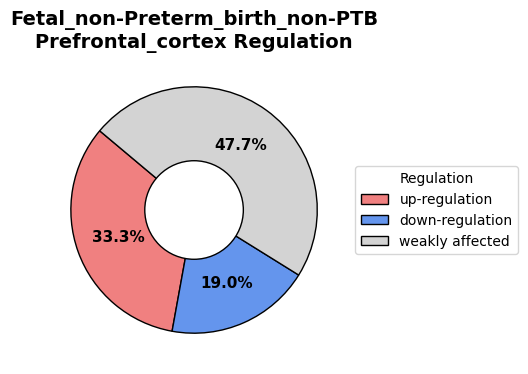

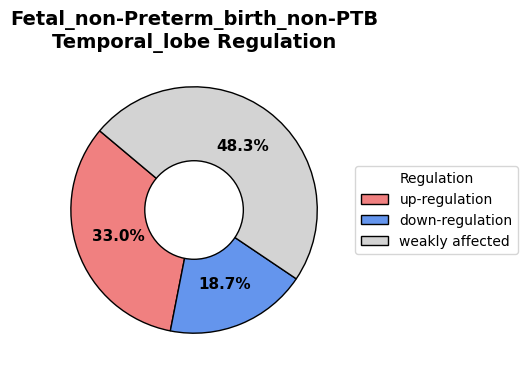

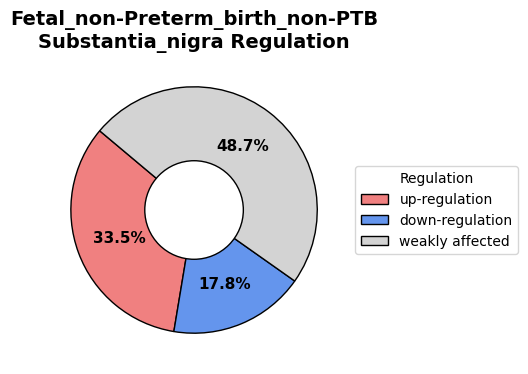

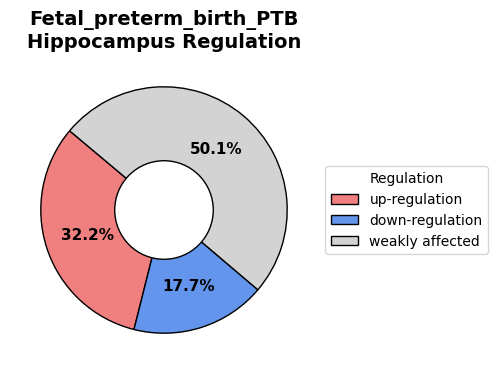

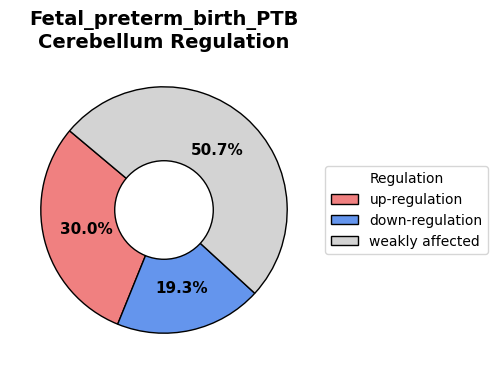

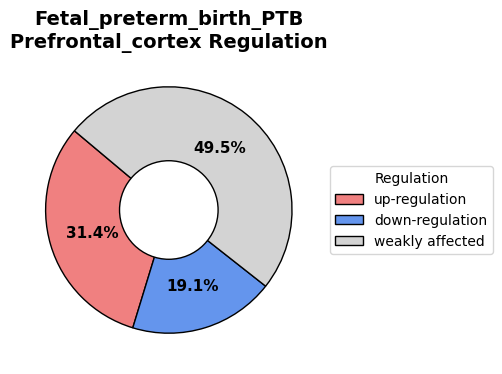

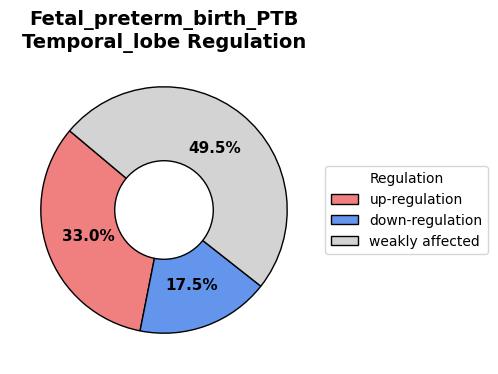

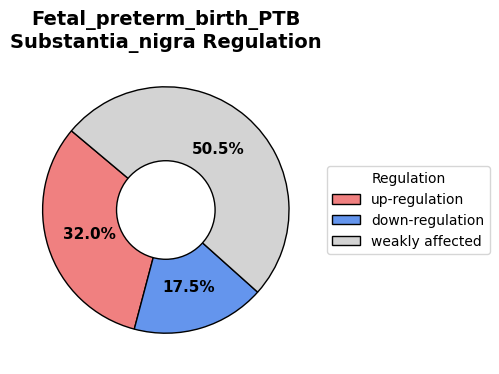

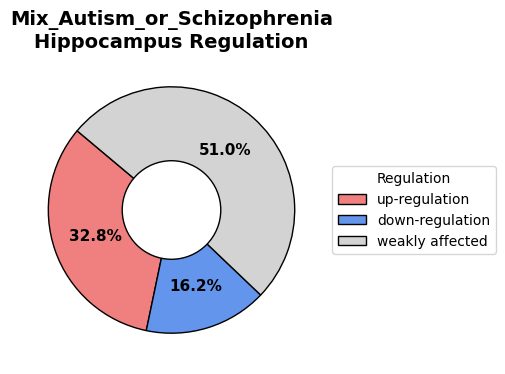

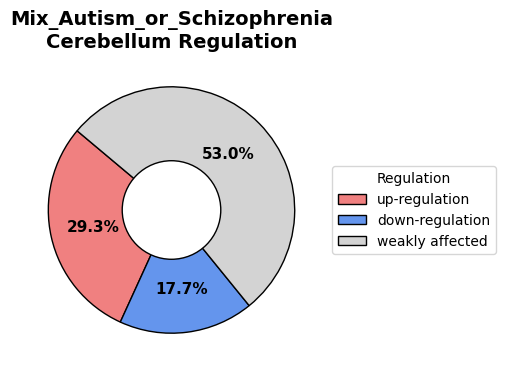

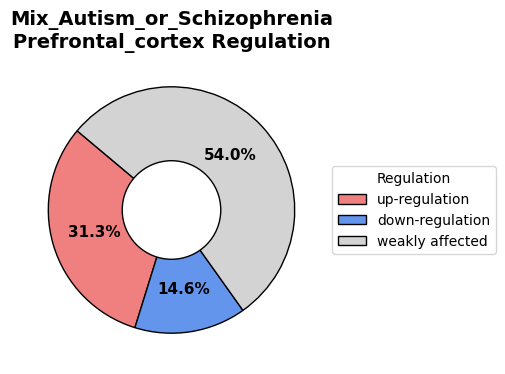

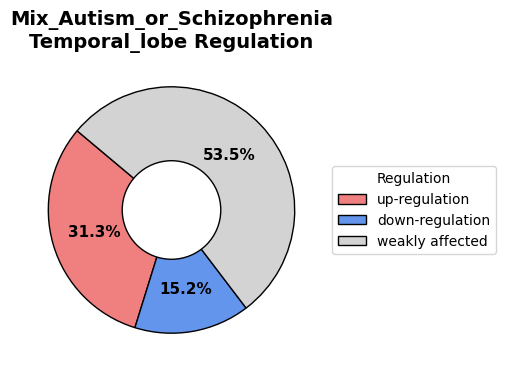

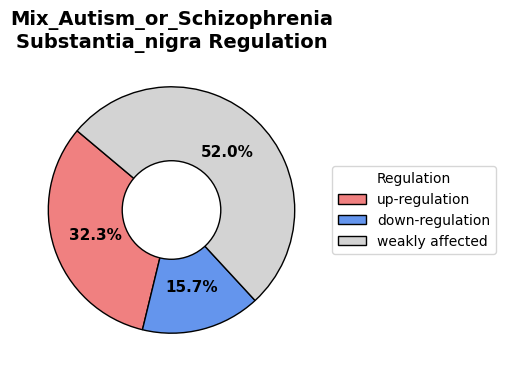

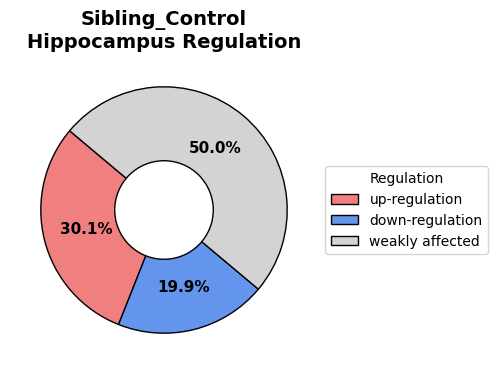

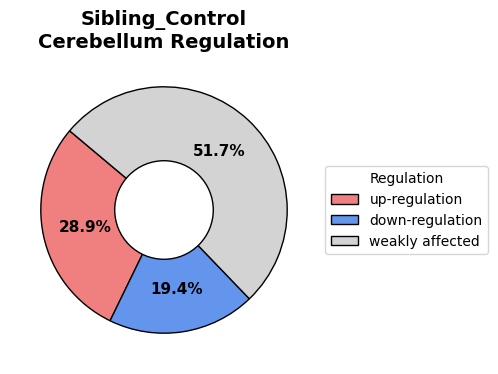

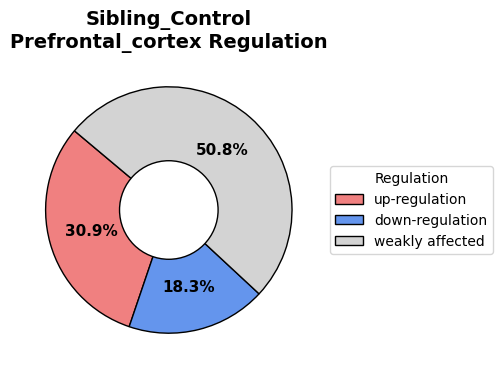

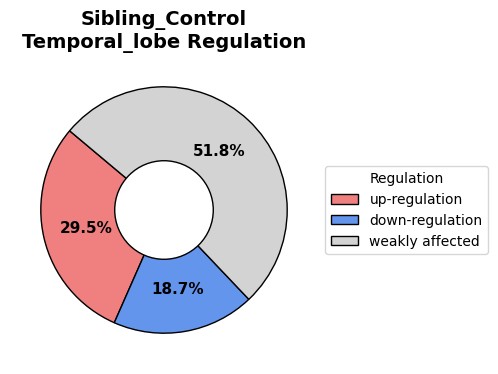

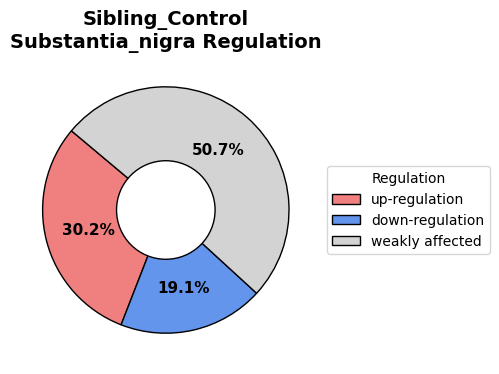

In [5]:
# colors = ["red", "blue", "gray"]
colors = ["#F08080", "#6495ED", "#D3D3D3"]
labels = ["up-regulation", "down-regulation", "weakly affected"]

for disease in disease_list:
    data = pd.read_csv('datasets/' + disease + '_pred_final.csv')
    for tissue in tissue_list:
        slope_col = f"{tissue}_slope"
        sign_col = f"{tissue}_sign"
        data[slope_col] = data[slope_col] * data[sign_col].map({'Up-regulation': 1, 'Down-regulation': -1})

        up = (data[slope_col] > 0.3).sum()
        down = (data[slope_col] < -0.3).sum()
        weak = ((data[slope_col] >= -0.3) & (data[slope_col] <= 0.3)).sum()
        
        values = [up, down, weak]

        fig, ax = plt.subplots(figsize=(4, 4))
        wedges, texts, autotexts = ax.pie(
            values, labels=None, colors=colors, autopct="%1.1f%%",
            startangle=140, pctdistance=0.65,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        )
        
        center_circle = plt.Circle((0, 0), 0.4, fc='white', edgecolor='black', linewidth=1)
        ax.add_artist(center_circle)
        
        for autotext in autotexts:
            autotext.set_fontsize(11)
            autotext.set_weight("bold")
        
        ax.legend(wedges, labels, title="Regulation", loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

        plt.title(f"{disease}\n{tissue.capitalize()} Regulation", fontsize=14, fontweight='bold')

        plt.savefig(f"images/{disease}_{tissue}_regulation_donut_label.png", dpi=300, bbox_inches="tight")
        plt.show()
        plt.close()



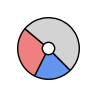

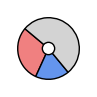

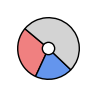

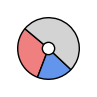

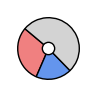

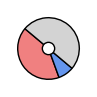

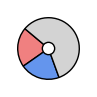

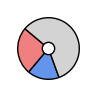

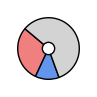

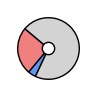

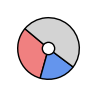

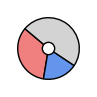

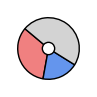

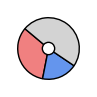

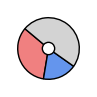

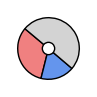

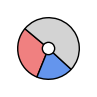

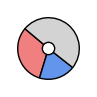

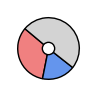

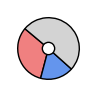

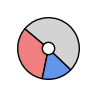

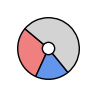

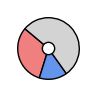

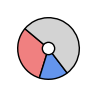

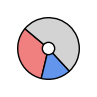

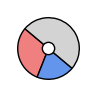

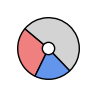

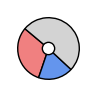

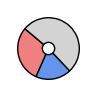

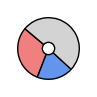

In [6]:
# colors = ["red", "blue", "gray"]
colors = ["#F08080", "#6495ED", "#D3D3D3"]
labels = ["up-regulation", "down-regulation", "weakly affected"]

for disease in disease_list:
    data = pd.read_csv('datasets/' + disease + '_pred_final.csv')
    for tissue in tissue_list:
        slope_col = f"{tissue}_slope"
        sign_col = f"{tissue}_sign"
        data[slope_col] = data[slope_col] * data[sign_col].map({'Up-regulation': 1, 'Down-regulation': -1})

        up = (data[slope_col] > 0.3).sum()
        down = (data[slope_col] < -0.3).sum()
        weak = ((data[slope_col] >= -0.3) & (data[slope_col] <= 0.3)).sum()
        
        values = [up, down, weak]

        fig, ax = plt.subplots(figsize=(1, 1))
        wedges, texts = plt.pie(
        values, labels=None, colors=colors,
        startangle=140, wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    )
        
        center_circle = plt.Circle((0, 0), 0.2, fc='white', edgecolor='black', linewidth=1)
        ax.add_artist(center_circle)

        plt.savefig(f"images/{disease}_{tissue}_regulation_donut.png", dpi=300, bbox_inches="tight")
        plt.show()
        plt.close()